# Data Cleaning and Exploration

In this notebook, we clean our data rows and columns, and visualize different aspects of our class and independent variables.

## Data Cleaning

In [16]:
#importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
#loaded in csv file
data = pd.read_csv('data/basketball_data.csv', index_col=[0])

In [18]:
data.year.unique()

array([2021, 2020, 2018, 2019, 2017, 2014, 2015, 2016, 2012, 2009, 2010,
       2011, 2013], dtype=int64)

In [19]:
#dropping unnecessary columns

data.drop(columns=['ht', 'type', 'TEAM', 'team', 'YEAR', 'Unnamed: 65', 'num', 'rimmade', 'rimmade+rimmiss', 'midmade', 
'midmade+midmiss', 'dunksmade', 'dunksmiss+dunksmade', 'pick', 'pfr', 'pid', 'gbpm', 'ogbpm', 'dgbpm', 'year'], inplace=True)

In [20]:
#renaming column
data.rename(columns={'Unnamed: 64': 'Position'}, inplace=True)

In [21]:
#created our target class (whether an observation has ROUND 1 value or ROUND 2 value)
data['Class'] = data.ROUND.apply(lambda x: 1 if x == 1 else 0)

In [22]:
#dropped more unneccessary columns
data.drop(columns=['ROUND', 'ROUND.1', 'OVERALL'], inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487 entries, 0 to 1486
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   player_name                      1487 non-null   object 
 1   AFFILIATION                      1487 non-null   object 
 2   conf                             1487 non-null   object 
 3   GP                               1487 non-null   int64  
 4   Min_per                          1487 non-null   float64
 5   Ortg                             1487 non-null   float64
 6   usg                              1487 non-null   float64
 7   eFG                              1487 non-null   float64
 8   TS_per                           1487 non-null   float64
 9   ORB_per                          1487 non-null   float64
 10  DRB_per                          1487 non-null   float64
 11  AST_per                          1487 non-null   float64
 12  TO_per              

In [24]:
data.yr.unique()

array(['Fr', 'So', 'Jr', 'Sr'], dtype=object)

# Exploratory Data Anaylisis

In [25]:
#separting dataframes by Class

#firstround picks
first_rd = data[data.Class==1]

#secondround picks
second_rd = data[data.Class==0]

In [37]:
first_rd.ORB_per.mean(), second_rd.ORB_per.mean()

(6.81958146487294, 6.326772616136918)

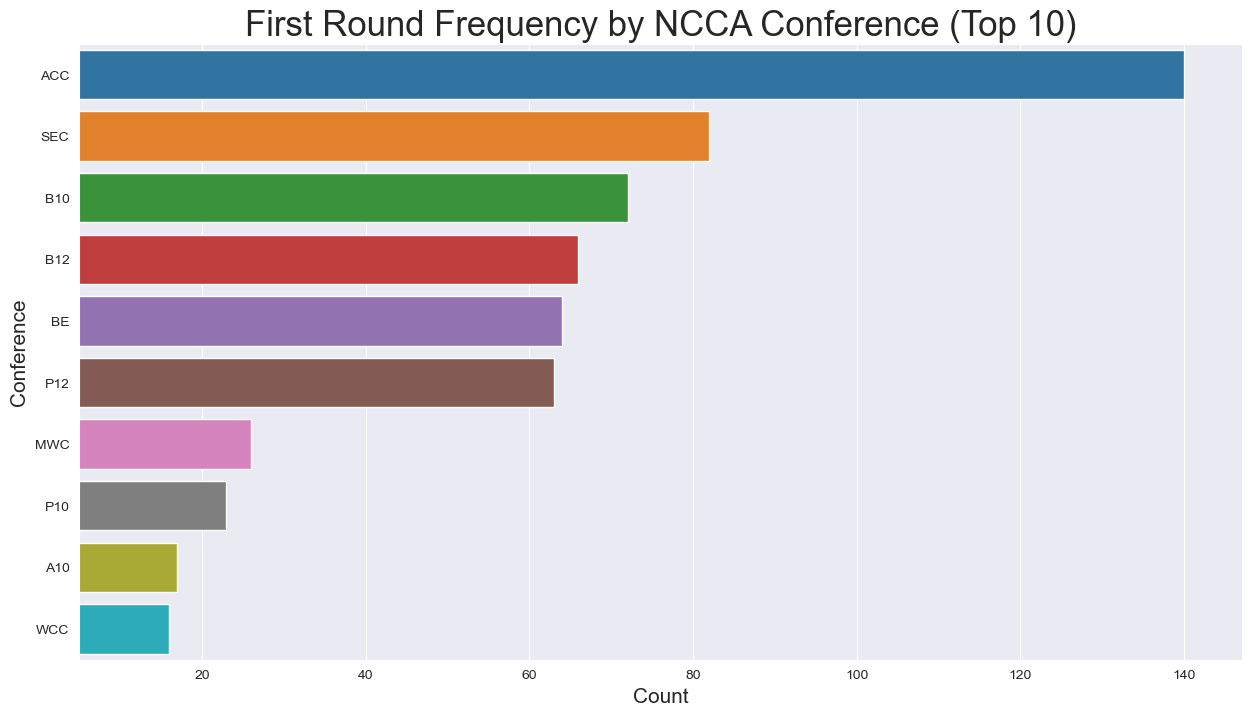

In [12]:
#plotting most frequenct conferences in first round draft picks

sns.set_style('darkgrid')

conference = first_rd.groupby(['conf'])['Class'].count().sort_values(ascending=False).iloc[:10].reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='Class', y='conf', data=conference, orient='h', ax=ax)

ax.set_title('First Round Frequency by NCCA Conference (Top 10)', fontsize=25)

ax.set_ylabel('Conference', fontsize=15)
ax.set_xlabel('Count', fontsize=15)
ax.set_xlim(5)


plt.show()


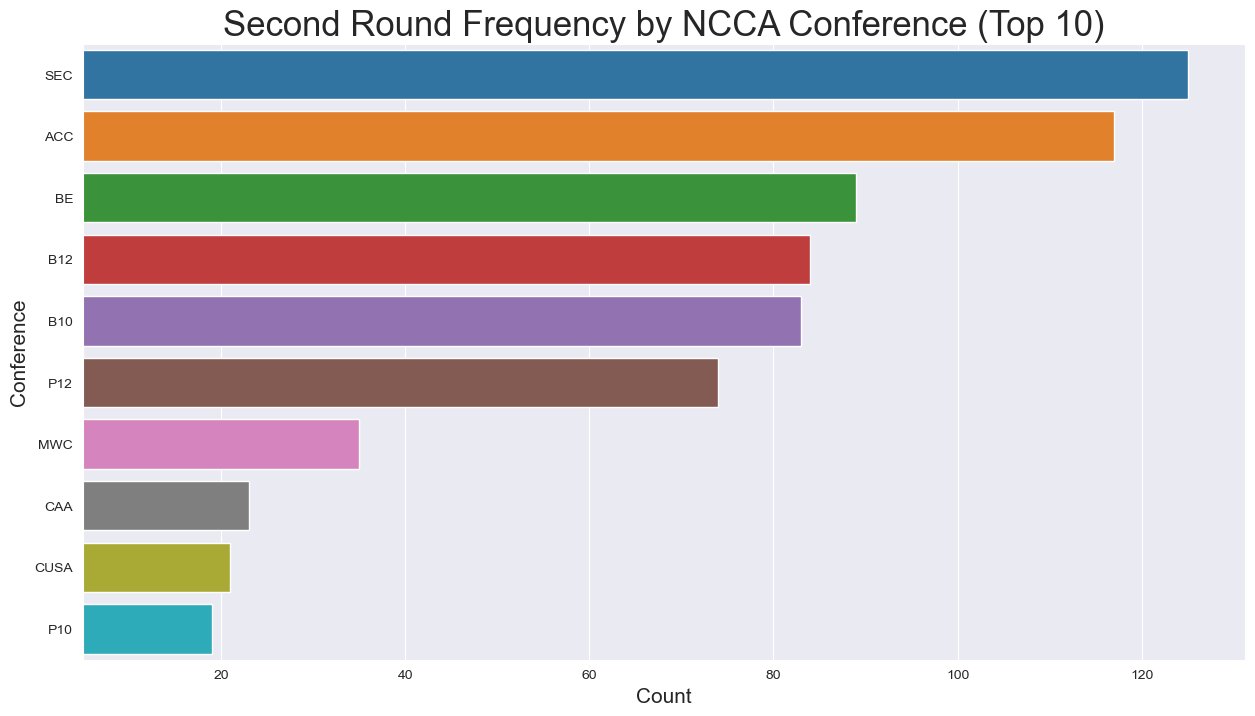

In [13]:
#plotting the most frequent conferences in second round draft picks

sns.set_style('darkgrid')

conference_two = second_rd.groupby(['conf'])['Class'].count().sort_values(ascending=False).iloc[:10].reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='Class', y='conf', data=conference_two, orient='h', ax=ax)

ax.set_title('Second Round Frequency by NCCA Conference (Top 10)', fontsize=25)

ax.set_ylabel('Conference', fontsize=15)
ax.set_xlabel('Count', fontsize=15)
ax.set_xlim(5)


plt.show()

#### Insights -- Conferences -- data['conf']

There seems to be a coorelation between round drafted and affilated conference. SEC and ACC are both top two in each round, while the next 8 in the list vary. This seems likely to be a quality predictor in our machine learning models.


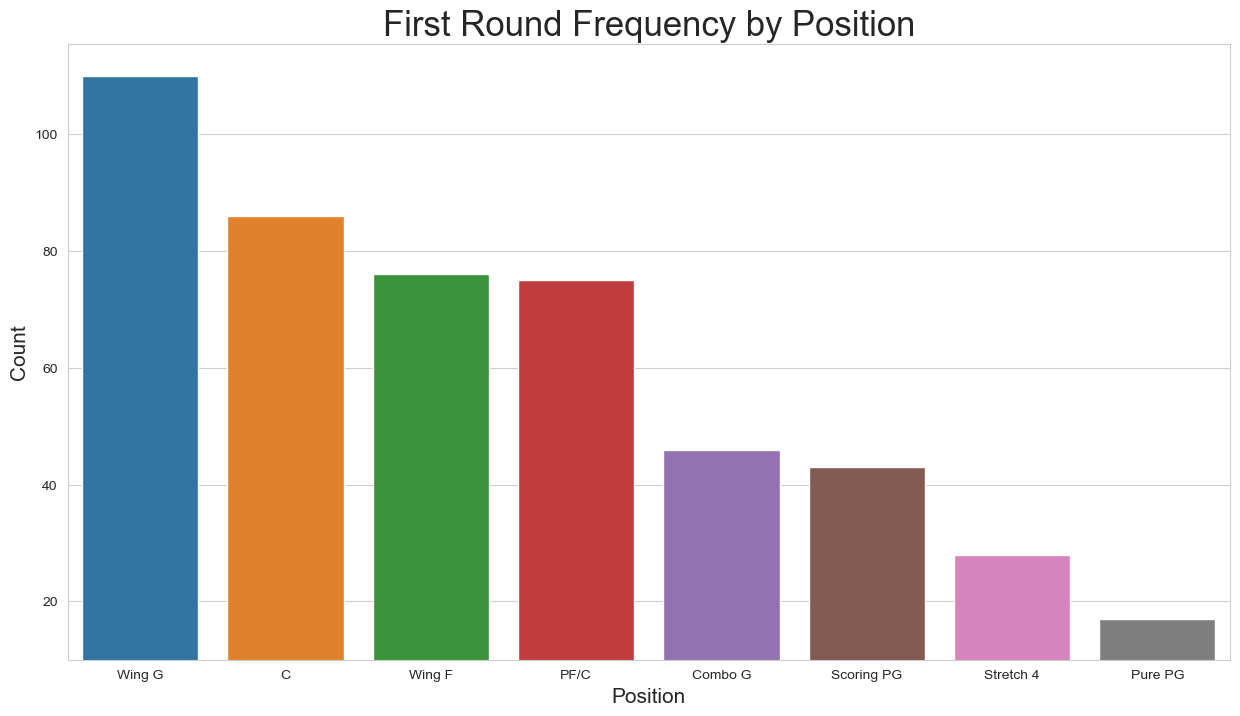

In [14]:
#plotting position frequency in first round picks

sns.set_style('whitegrid')


position = first_rd.dropna().groupby(['Position'])['Class'].count().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='Position', y='Class', data=position)

ax.set_title('First Round Frequency by Position', fontsize=25)

ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Position', fontsize=15)

ax.set_ylim(10)

plt.show()


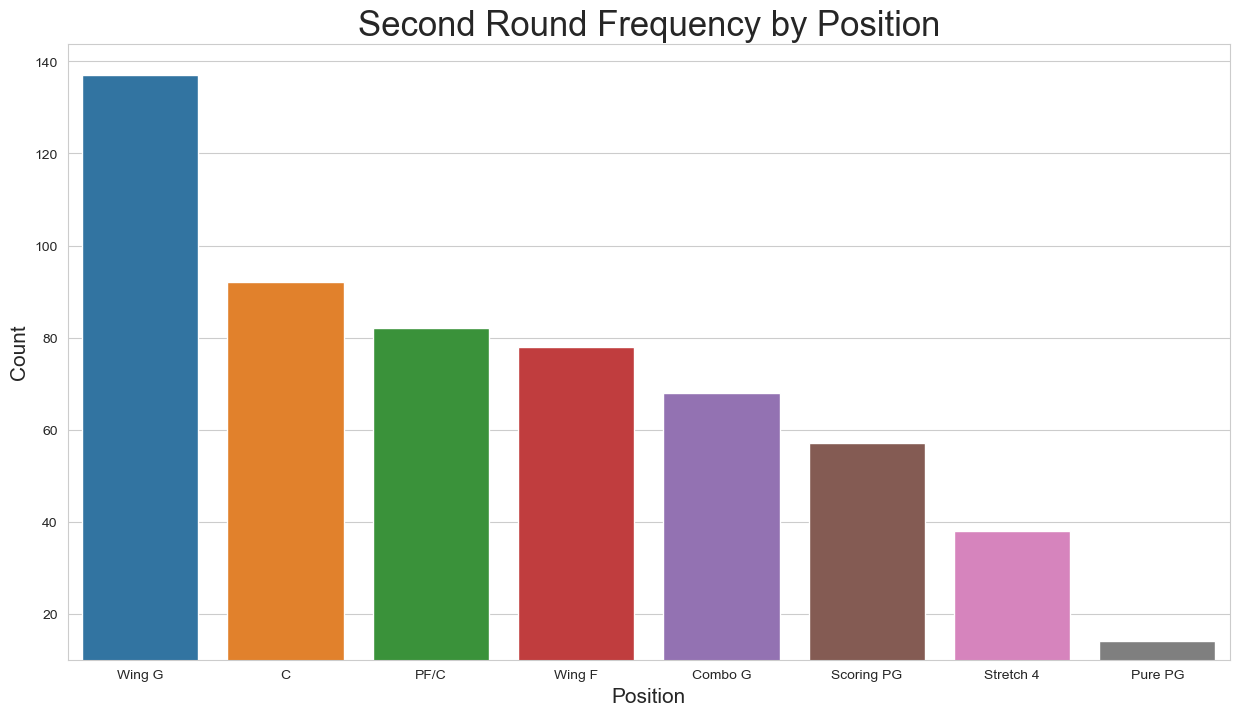

In [15]:
#plotting position frequency in second round picks

sns.set_style('whitegrid')

position_two = second_rd.dropna().groupby(['Position'])['Class'].count().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='Position', y='Class', data=position_two)

ax.set_title('Second Round Frequency by Position', fontsize=25)

ax.set_ylabel('Count', fontsize=15)
ax.set_xlabel('Position', fontsize=15)

ax.set_ylim(10)

plt.show()

#### Insights -- Position -- data['Position']

There doesn't seem to be any coorelation between position and drafted round. The counts and order of positions for both classes are almost equlivalent. This will likely not be a good predictor in our machine learning model.

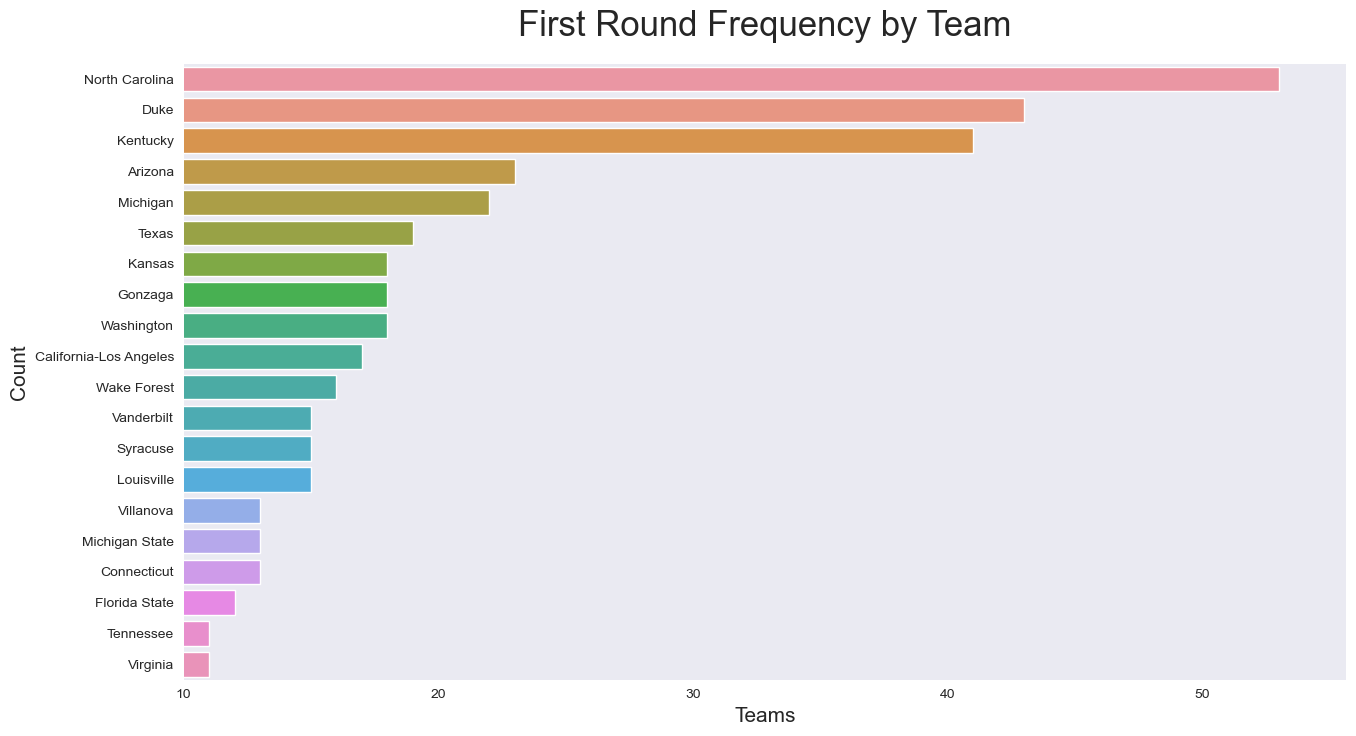

In [16]:
#plotting first round frequency by college team

sns.set_style('dark')

team = first_rd.groupby(['AFFILIATION'])['Class'].count().sort_values(ascending=False).iloc[:20].reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='Class', y='AFFILIATION', data=team, orient='h')

ax.set_title('First Round Frequency by Team', fontsize=25, pad=20)
ax.set_xlabel('Teams', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

ax.set_xlim(10)

sns.despine(left=True, bottom=True)

plt.show()



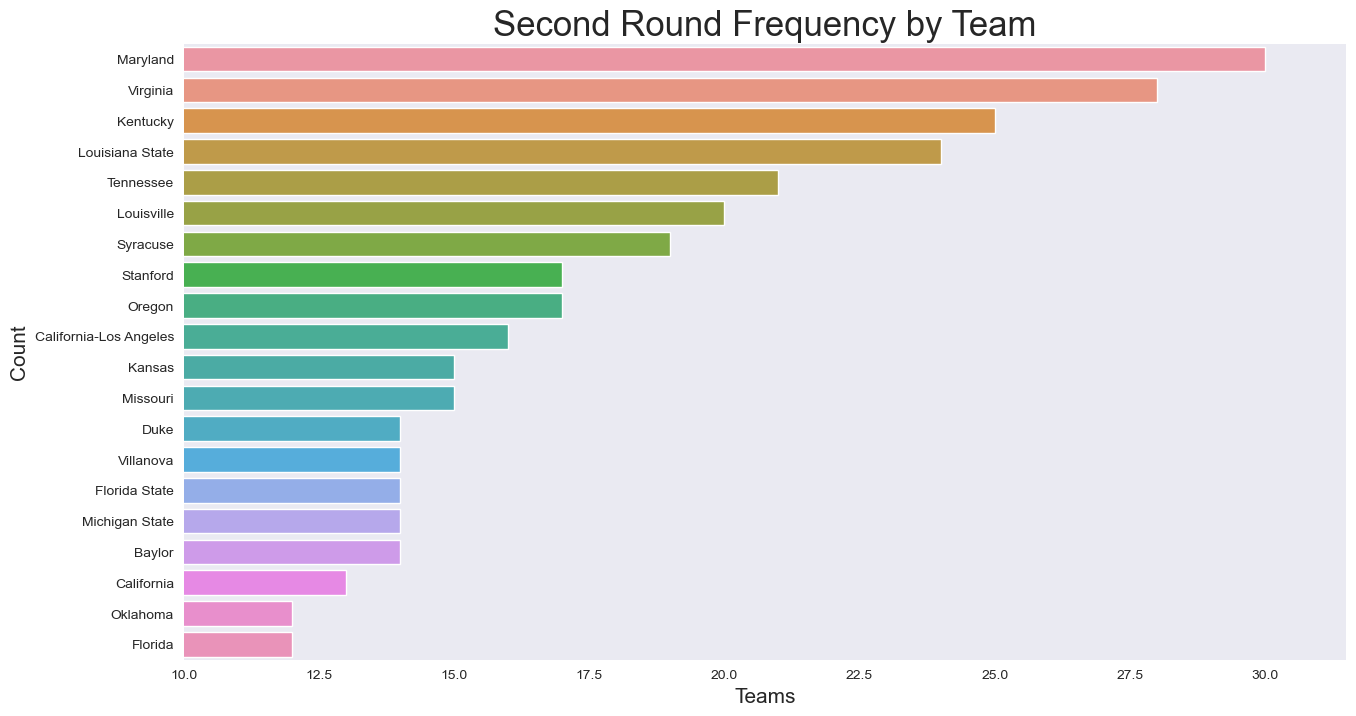

In [17]:
#plotting first round frequency by college team

sns.set_style('dark')

team_two = second_rd.groupby(['AFFILIATION'])['Class'].count().sort_values(ascending=False).iloc[:20].reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='Class', y='AFFILIATION', data=team_two, orient='h')

ax.set_title('Second Round Frequency by Team', fontsize=25)
ax.set_xlabel('Teams', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

ax.set_xlim(10)

sns.despine(left=True, bottom=True)


plt.show()

#### Insights -- Teams -- data['AFFILATION]

There's seems to be a high coorelation between the drafted round and the team the player is affilated with. Duke and North Carolina dominate the top two spots in the first round while not having much impact in the second round. On the other hand, Maryland has many players in the second round while not placing in the top twenty for the first round. This variable will likely be a good predictor in our machine learning model.

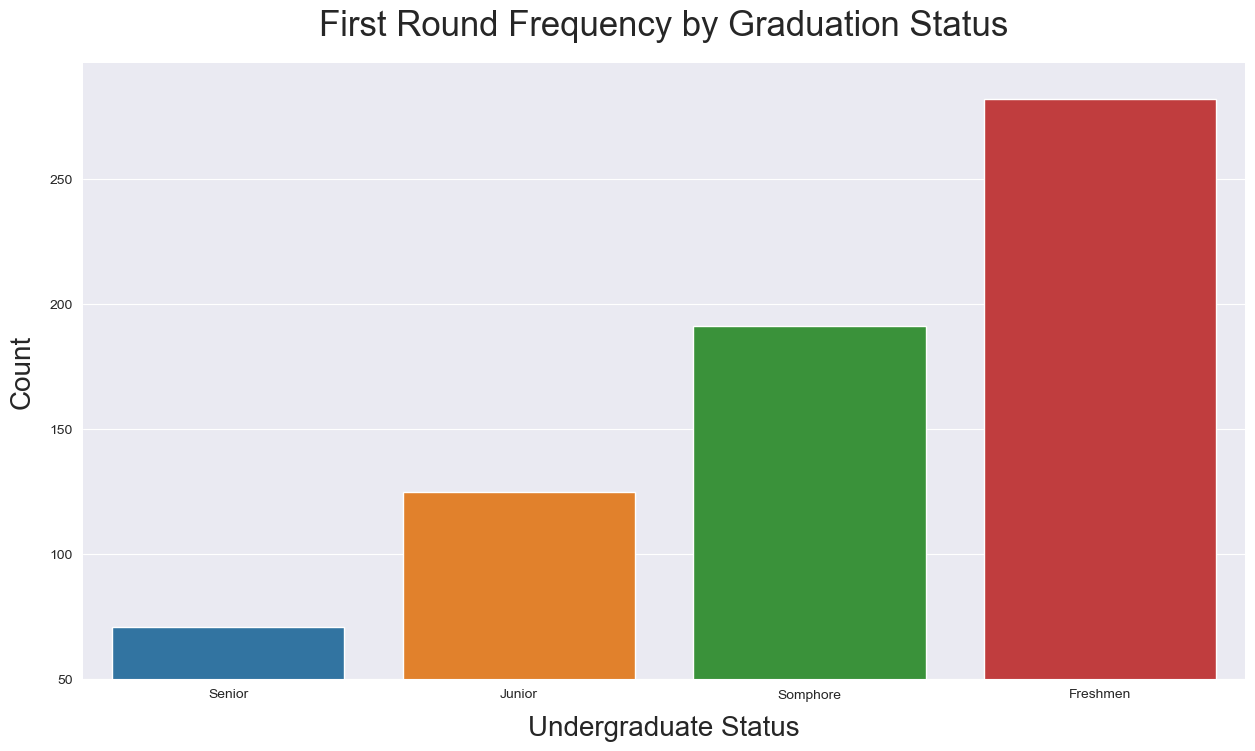

In [18]:
#plotting graduation status frequency in first round draft picks

sns.set_style('darkgrid')

year = first_rd.groupby(['yr'])['Class'].count().sort_values().reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='yr', y='Class', data=year)

ax.set_title('First Round Frequency by Graduation Status', fontsize=25, pad=20)
ax.set_xlabel('Undergraduate Status', fontsize=20, labelpad=10)
ax.set_ylabel('Count', fontsize=20, labelpad=10)

ax.set_xticklabels(['Senior', 'Junior', 'Somphore', 'Freshmen'])

ax.set_ylim(50)
sns.despine(left=True, right=True)

plt.show()

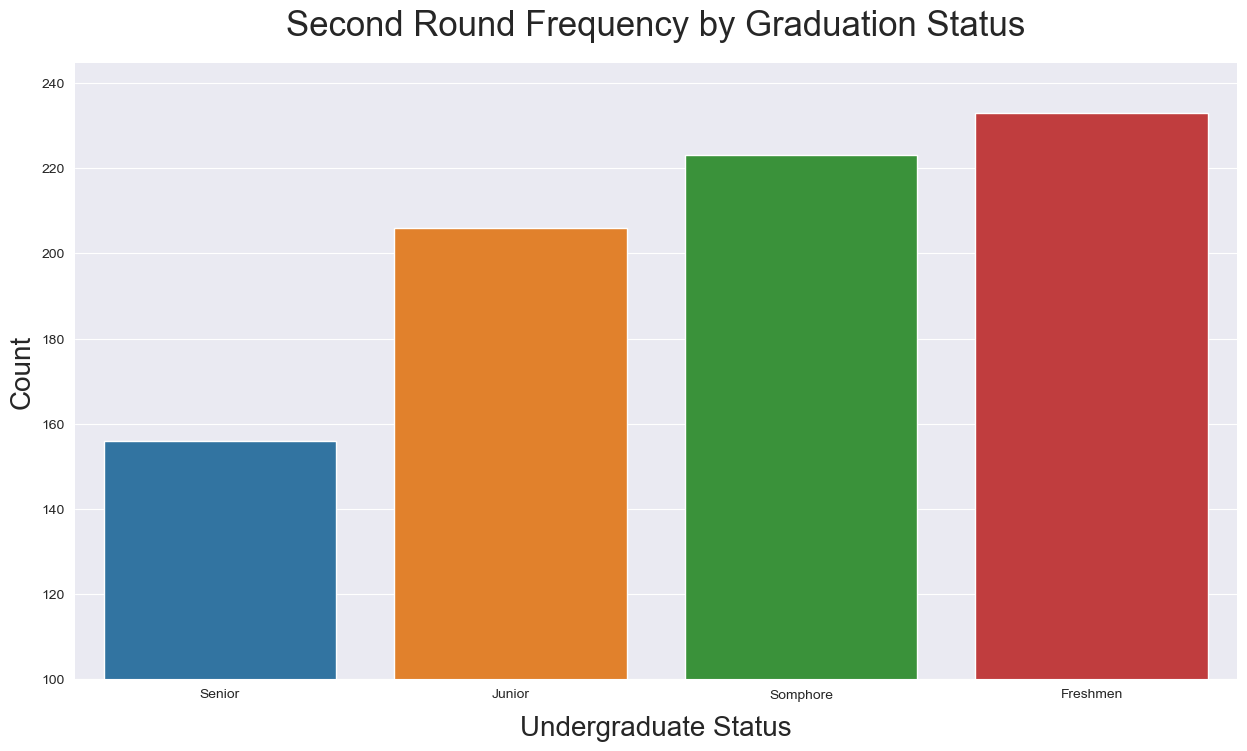

In [19]:
#plotting graduation status frequency in second round draft picks

sns.set_style('darkgrid')

year_two = second_rd.groupby(['yr'])['Class'].count().sort_values().reset_index()

fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x='yr', y='Class', data=year_two)

ax.set_title('Second Round Frequency by Graduation Status', fontsize=25, pad=20)
ax.set_xlabel('Undergraduate Status', fontsize=20, labelpad=10)
ax.set_ylabel('Count', fontsize=20)
ax.set_xticklabels(['Senior', 'Junior', 'Somphore', 'Freshmen'])

sns.despine(left=True, right=True)

ax.set_ylim(100)

plt.show()

#### Insights -- Graduation Stats -- data['yr']

There seems to be a mild coorelation between round pick and graduation status. Freshmen dominate both the first and second round. However, upperclassmen having much higher frequencies in the second round compared to the first round. This might be a solid predictor for a our machine learning models.

## Numerical Indicators

In this section, we search for mean differences between round 1 players and round 2 players

In [20]:
#grouping by class and doing aggreagations

agg_data = data.groupby(['Class']).agg(['mean', 'median'])

In [21]:
#creating list to loop through
plotting = []

for i in list(agg_data.columns):
    if i[0] in plotting:
        continue
    else:
        plotting.append(i[0])

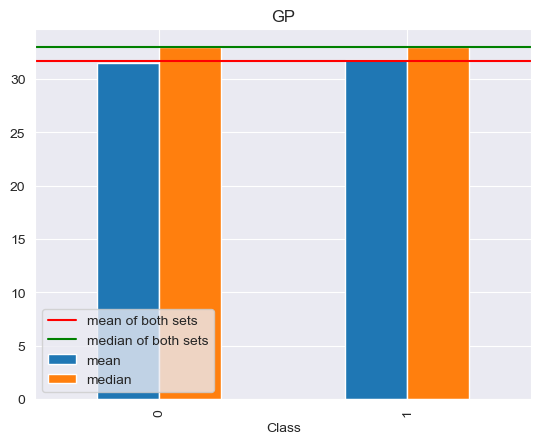

<Figure size 640x480 with 0 Axes>

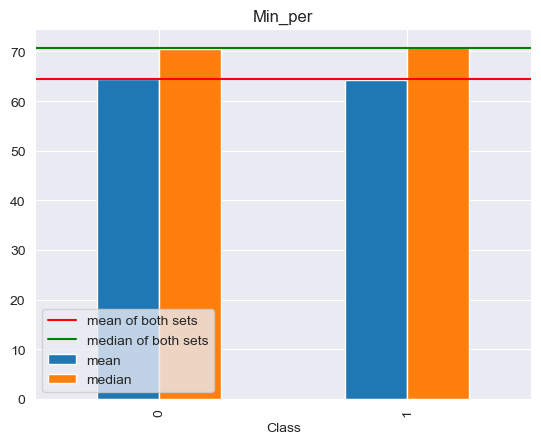

<Figure size 640x480 with 0 Axes>

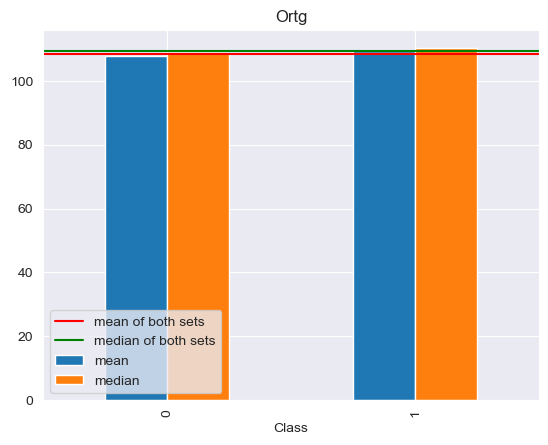

<Figure size 640x480 with 0 Axes>

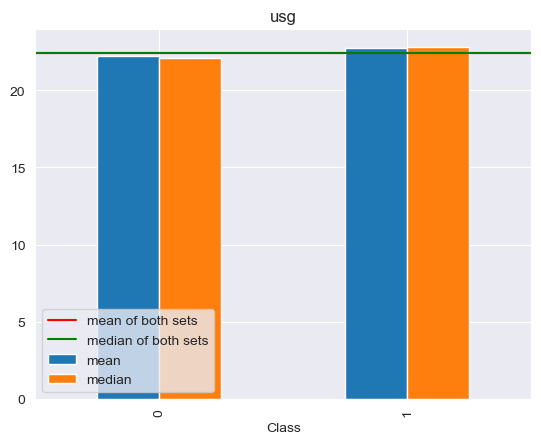

<Figure size 640x480 with 0 Axes>

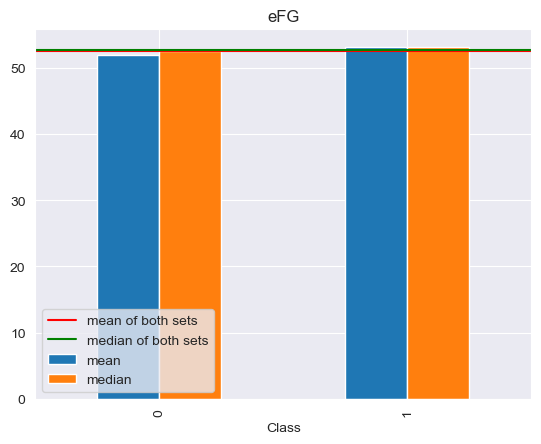

<Figure size 640x480 with 0 Axes>

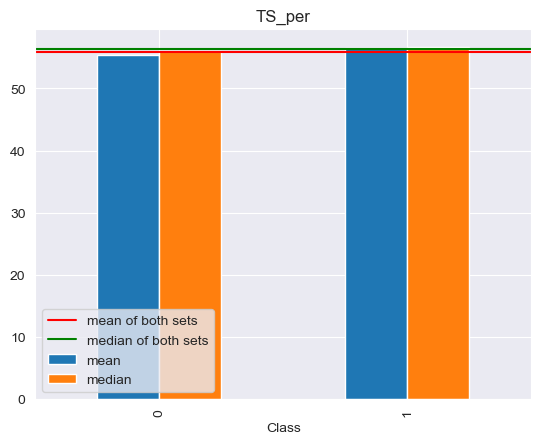

<Figure size 640x480 with 0 Axes>

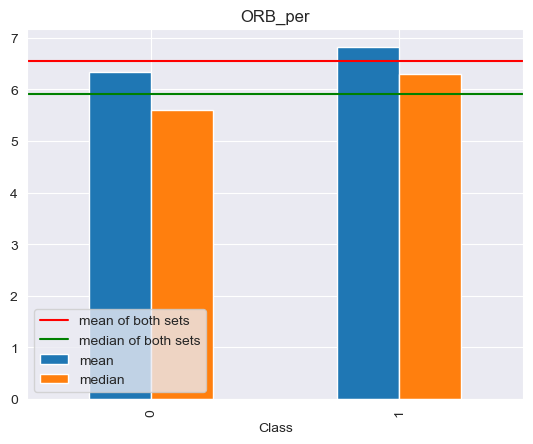

<Figure size 640x480 with 0 Axes>

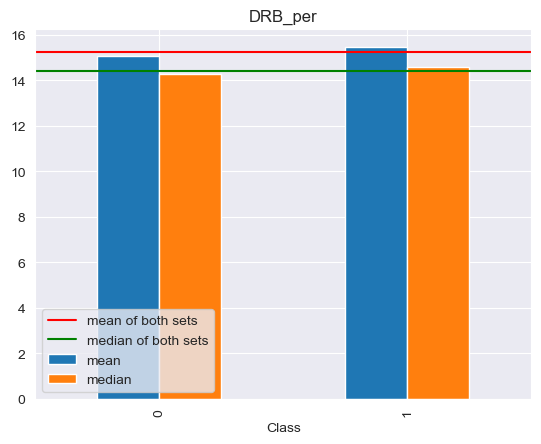

<Figure size 640x480 with 0 Axes>

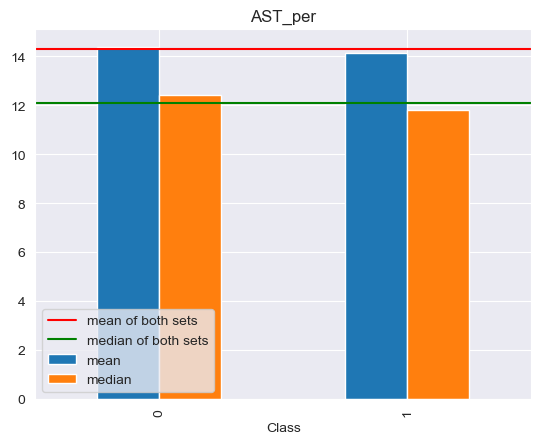

<Figure size 640x480 with 0 Axes>

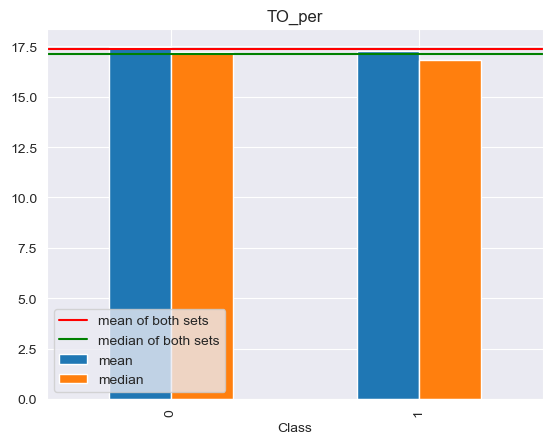

<Figure size 640x480 with 0 Axes>

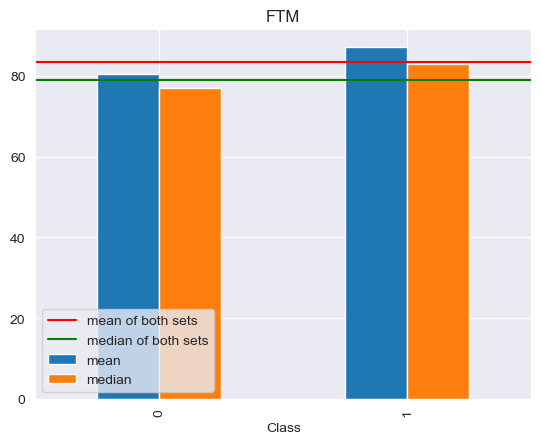

<Figure size 640x480 with 0 Axes>

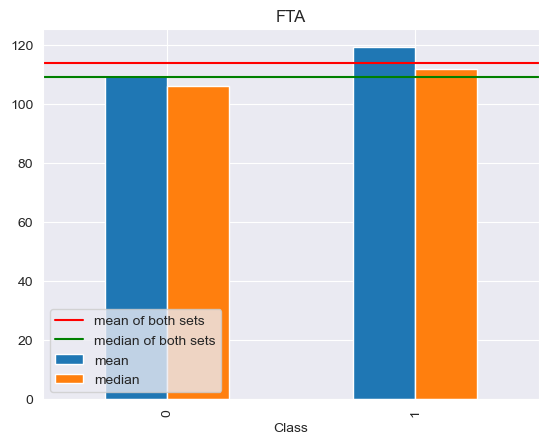

<Figure size 640x480 with 0 Axes>

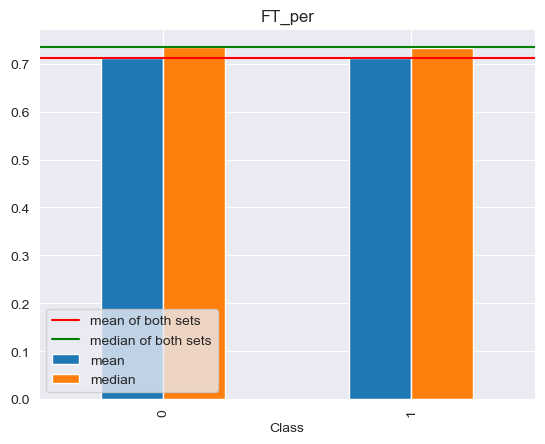

<Figure size 640x480 with 0 Axes>

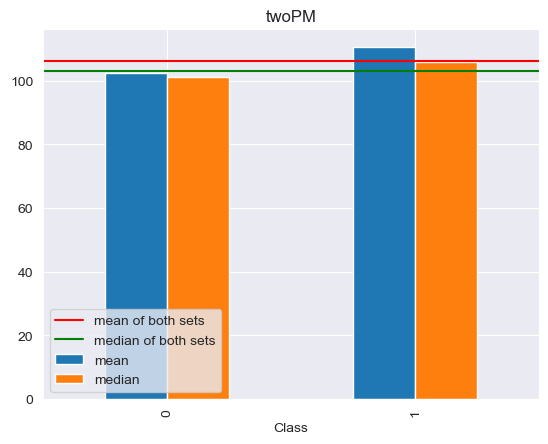

<Figure size 640x480 with 0 Axes>

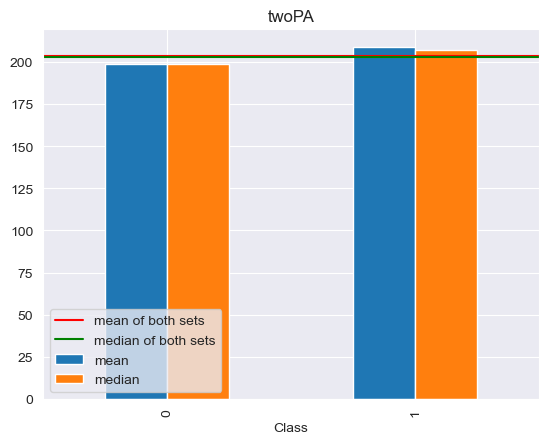

<Figure size 640x480 with 0 Axes>

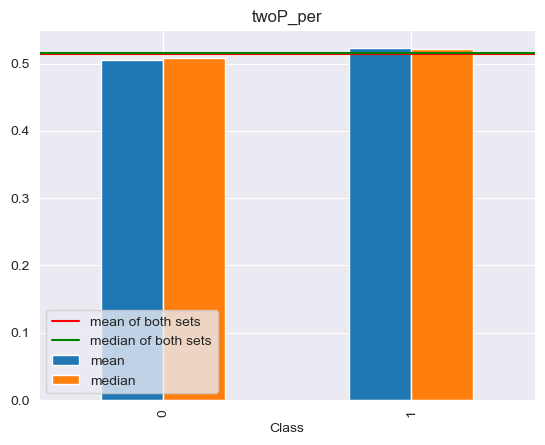

<Figure size 640x480 with 0 Axes>

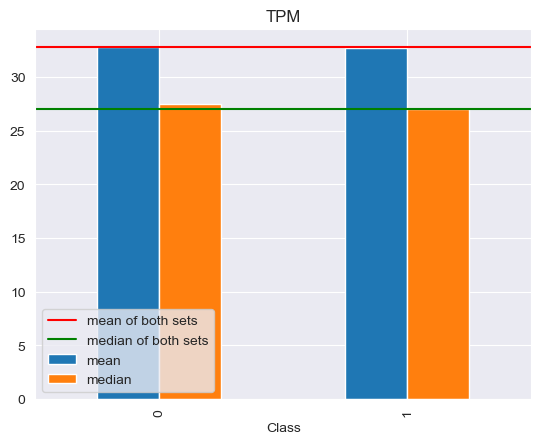

<Figure size 640x480 with 0 Axes>

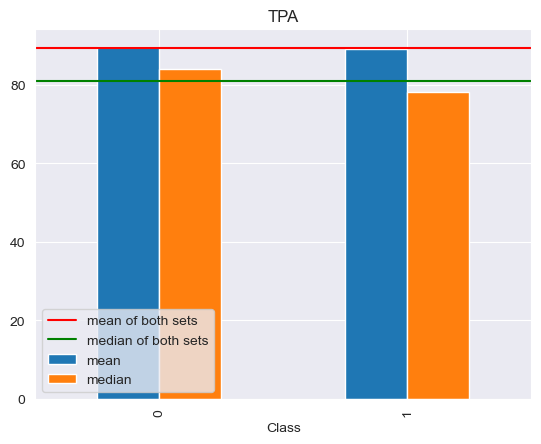

<Figure size 640x480 with 0 Axes>

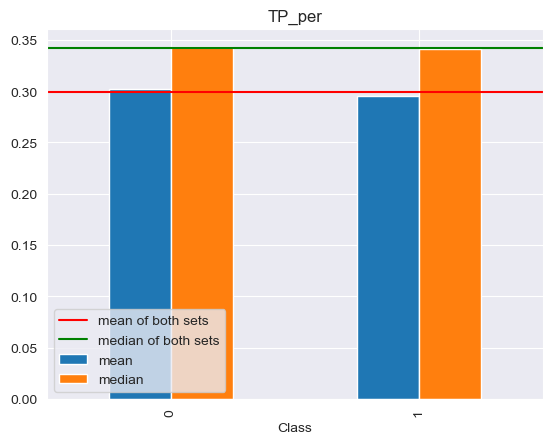

<Figure size 640x480 with 0 Axes>

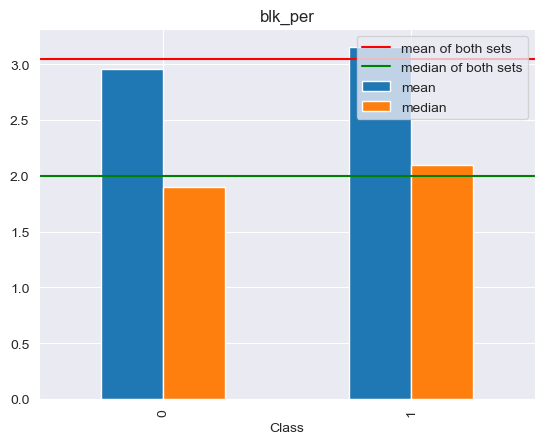

<Figure size 640x480 with 0 Axes>

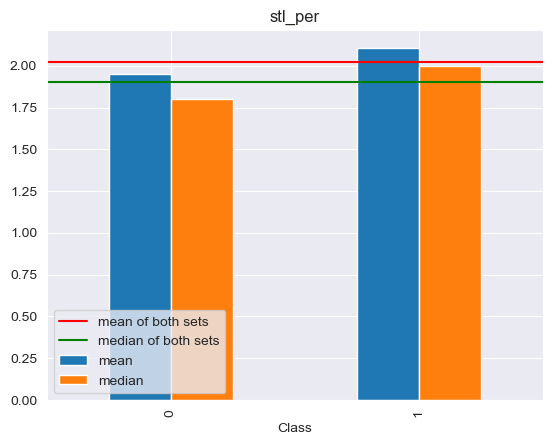

<Figure size 640x480 with 0 Axes>

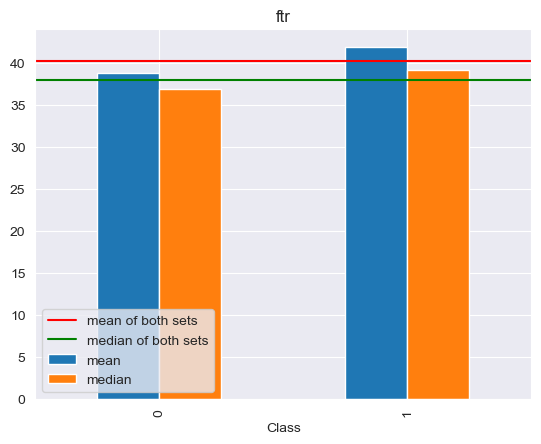

<Figure size 640x480 with 0 Axes>

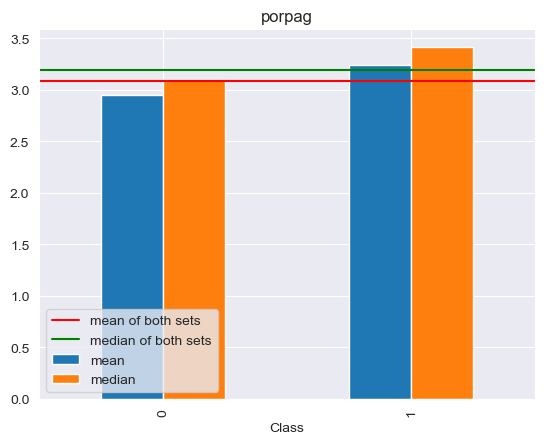

<Figure size 640x480 with 0 Axes>

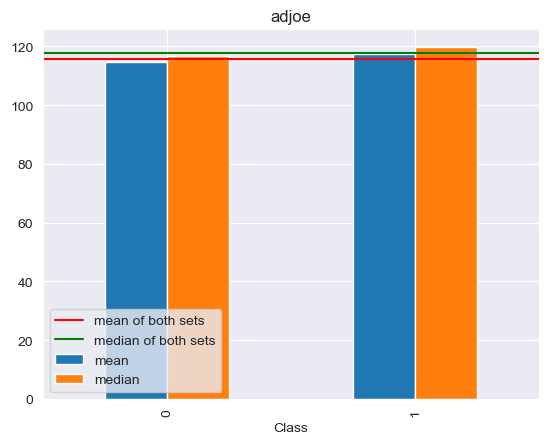

<Figure size 640x480 with 0 Axes>

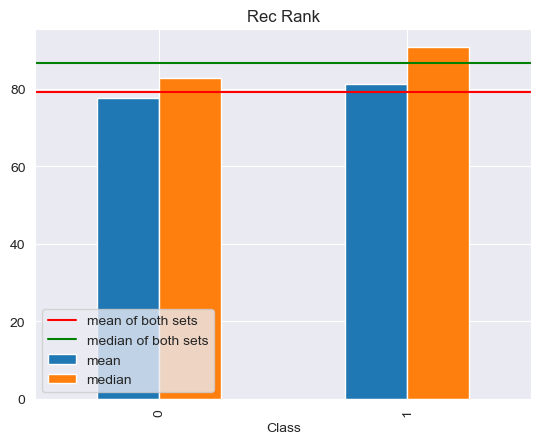

<Figure size 640x480 with 0 Axes>

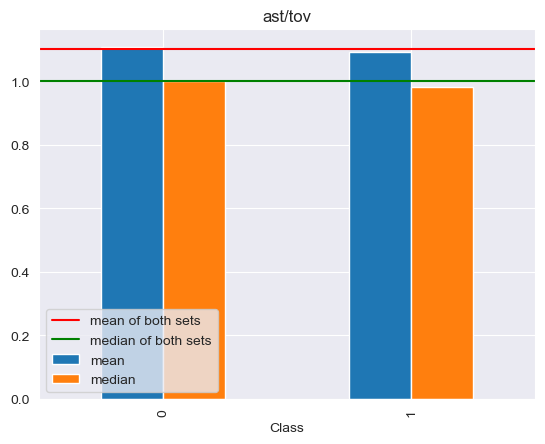

<Figure size 640x480 with 0 Axes>

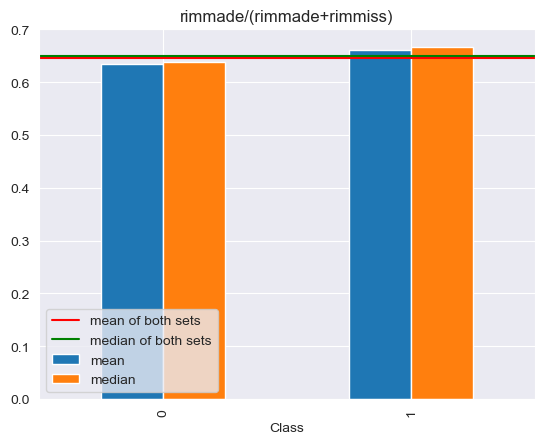

<Figure size 640x480 with 0 Axes>

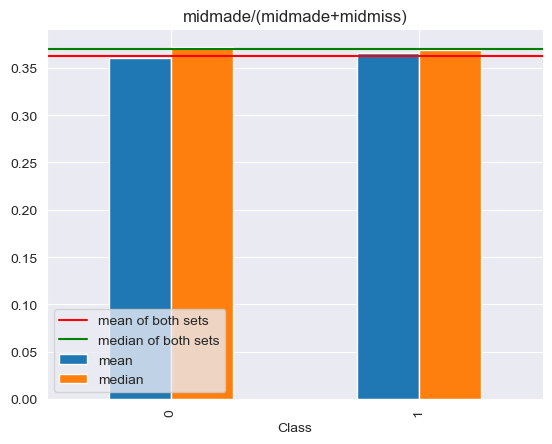

<Figure size 640x480 with 0 Axes>

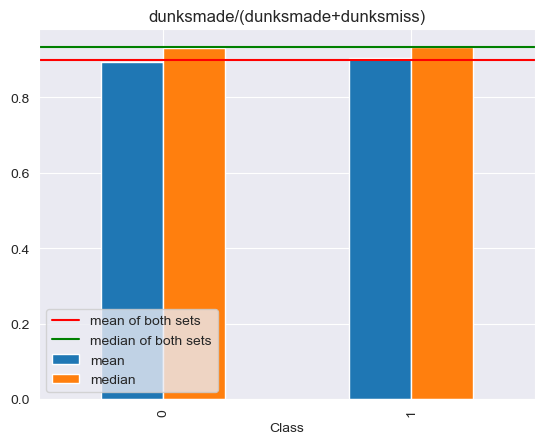

<Figure size 640x480 with 0 Axes>

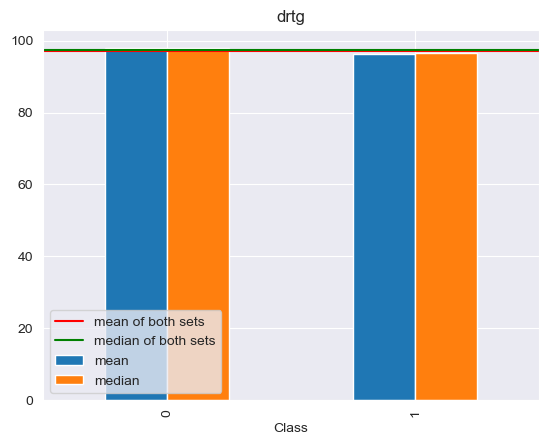

<Figure size 640x480 with 0 Axes>

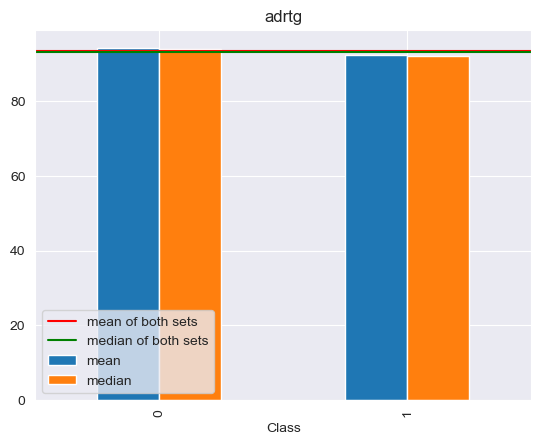

<Figure size 640x480 with 0 Axes>

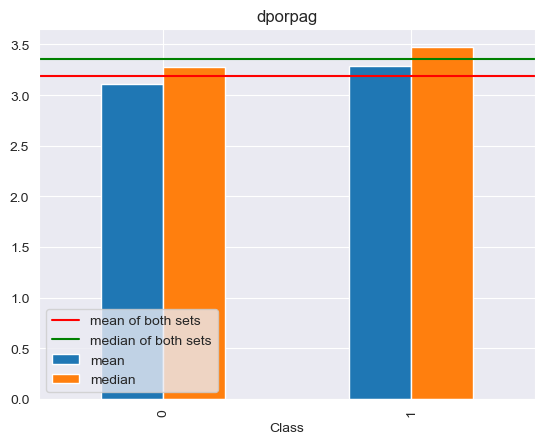

<Figure size 640x480 with 0 Axes>

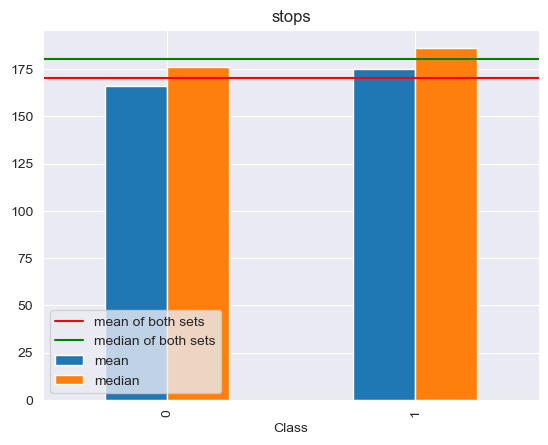

<Figure size 640x480 with 0 Axes>

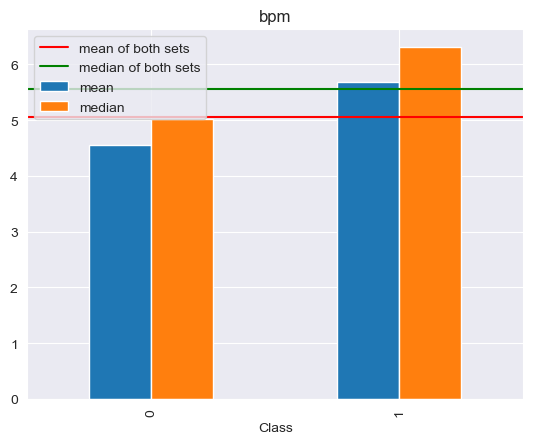

<Figure size 640x480 with 0 Axes>

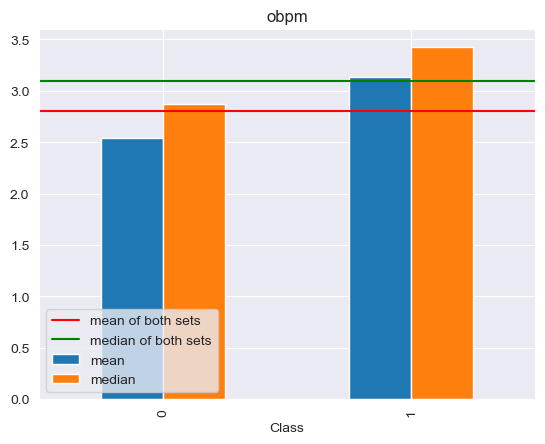

<Figure size 640x480 with 0 Axes>

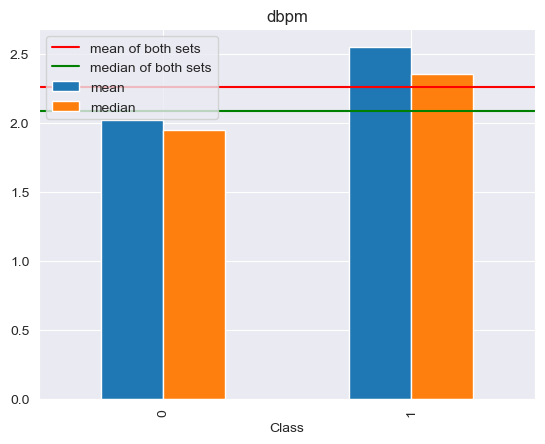

<Figure size 640x480 with 0 Axes>

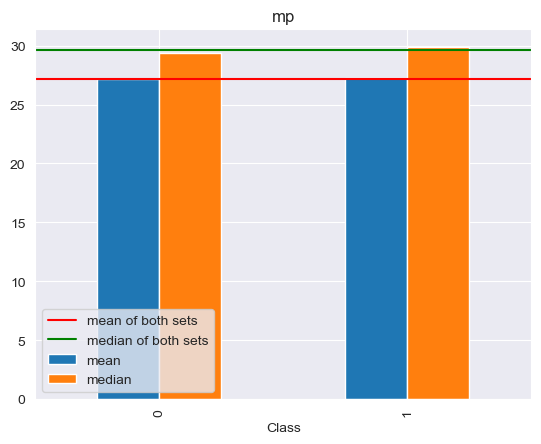

<Figure size 640x480 with 0 Axes>

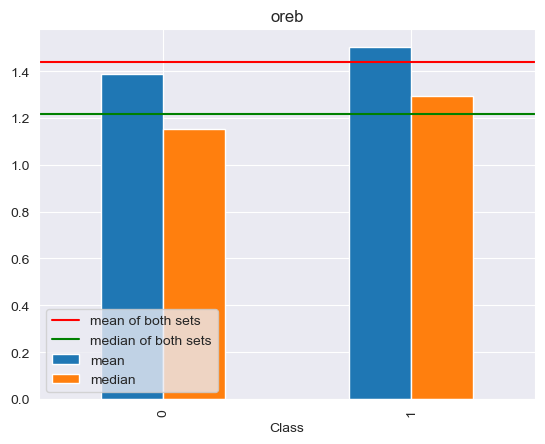

<Figure size 640x480 with 0 Axes>

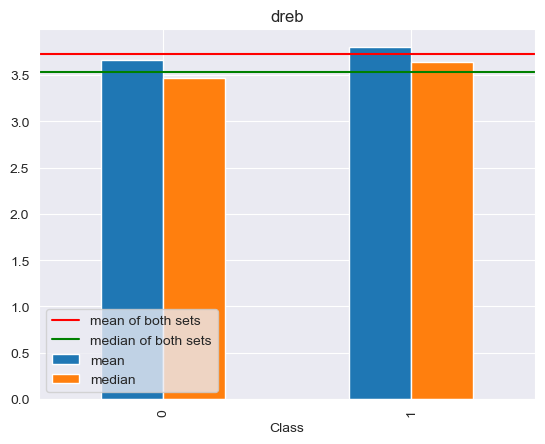

<Figure size 640x480 with 0 Axes>

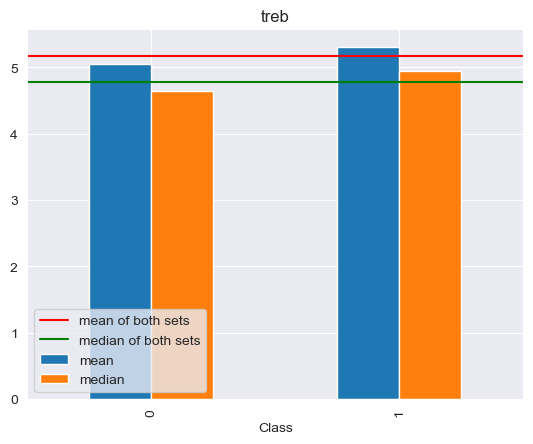

<Figure size 640x480 with 0 Axes>

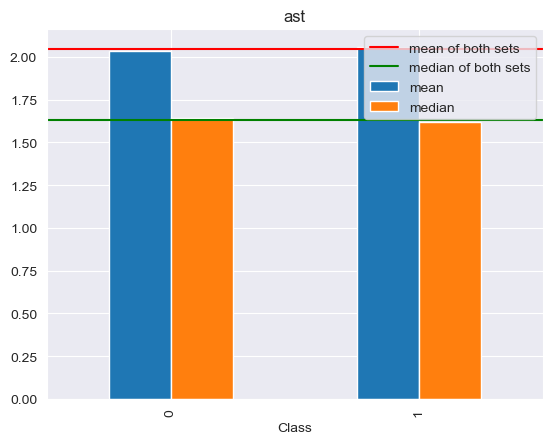

<Figure size 640x480 with 0 Axes>

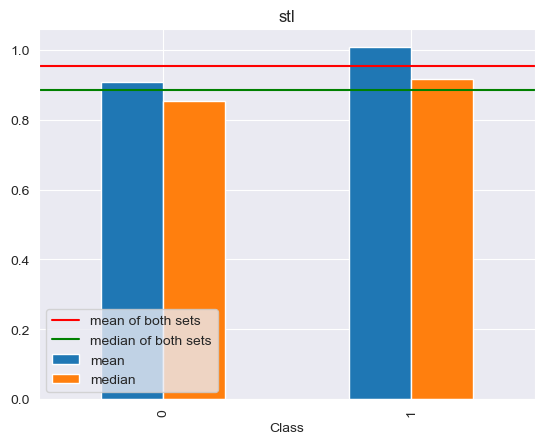

<Figure size 640x480 with 0 Axes>

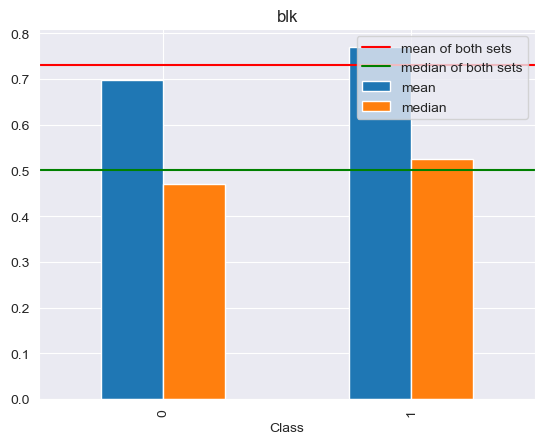

<Figure size 640x480 with 0 Axes>

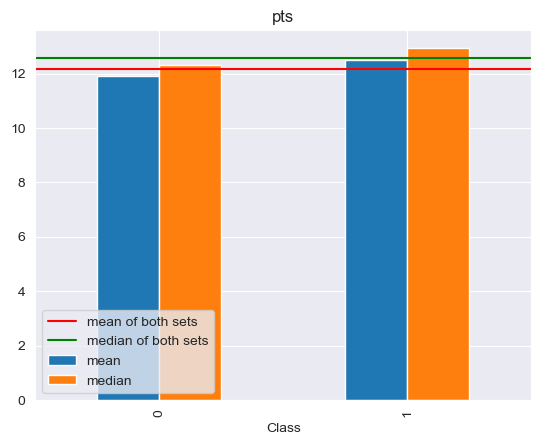

In [22]:
#plotting bar graphs to compare means and medians between numeric variables in each class

for i in plotting:
    agg_data[i].plot(kind='bar')
    plt.axhline(data[i].mean(), color='red', label='mean of both sets')
    plt.axhline(data[i].median(), color='g', label= 'median of both sets')
    print()
    plt.title(i)
    plt.legend()
    plt.show()
    plt.clf()

#### Insights -- Numeric Variables

Visually, there is a difference between means group by class for these variables: 'ORB_per', 'AST_per', 'FTM', 'FTA', 'twoPM', 'twoPA', 'TPA', 'blk_per', 'stl_per', 'ftr','porpag', 'Rec Rank', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'treb'.

We decided to run Welch's ttests on each variables to see if there's a significant difference in their means.



In [23]:
#imported necessary function
from scipy.stats import ttest_ind

#created a function to print and return variable name and pval associated with its respective welch test
def ttest(A, B, i):

    tstat, pval = ttest_ind(A[i], B[i], equal_var=False)
    print('{}: {}'.format(i, pval))
    return i, pval

#selected variables for ttests
selected_cols = ['ORB_per', 'AST_per', 'FTM', 'FTA', 'twoPM', 'twoPA', 'TPA', 'blk_per', 'stl_per', 'ftr','porpag', 'Rec Rank', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'treb']

#initalize lists to append pvals with less than 0.05 significance level
pvals = []
names = []

#looped through and ran ttests
for i in selected_cols:

    name, pval = ttest(first_rd, second_rd, i)
    if pval < 0.05:
        pvals.append(pval)
        names.append(name)

ORB_per: 0.022373504852642424
AST_per: 0.621992229705563
FTM: 0.009444412850011795
FTA: 0.0028624530479329164
twoPM: 0.0064073991953251365
twoPA: 0.06536280957203949
TPA: 0.8773818139073044
blk_per: 0.19864422848815047
stl_per: 0.0011703897631473801
ftr: 0.007876589814481463
porpag: 0.0012601397952812577
Rec Rank: nan
dporpag: 0.0018221762124607823
stops: 0.007943730987877502
bpm: 6.98917383744234e-08
obpm: 0.00017316169081619452
dbpm: 2.133746860607521e-05
treb: 0.04675470710915651


C:\Users\mikey\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [24]:
#rec rank has null values so separate ttest was done
tstat, pval = ttest_ind(first_rd['Rec Rank'].dropna(),second_rd['Rec Rank'].dropna(), equal_var=False)
pvals.append(pval)
names.append('Rec Rank')

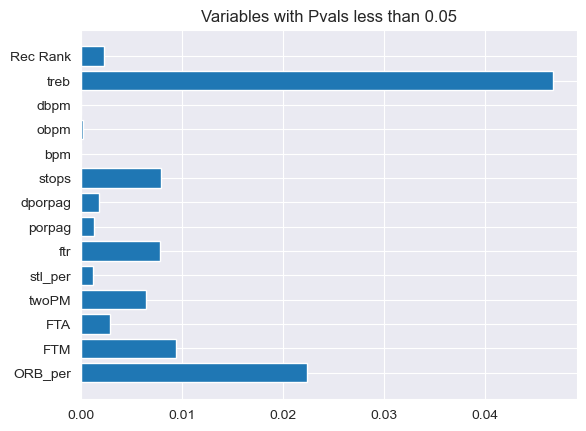

In [25]:
#plotting pvalues of varaibles with less than the significance level

plt.barh(names, pvals)
plt.title('Variables with Pvals less than 0.05')
plt.show()

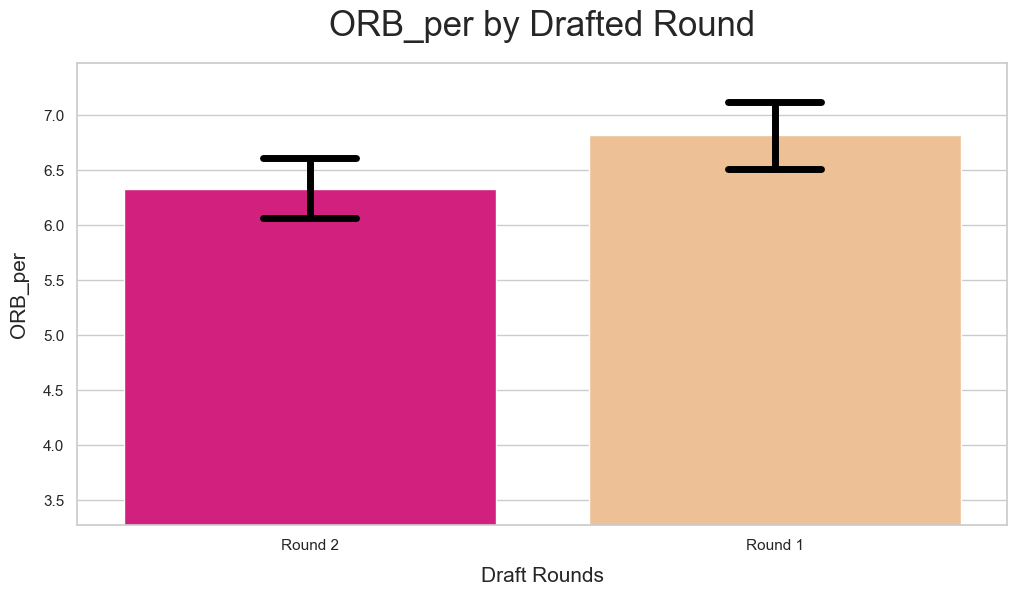

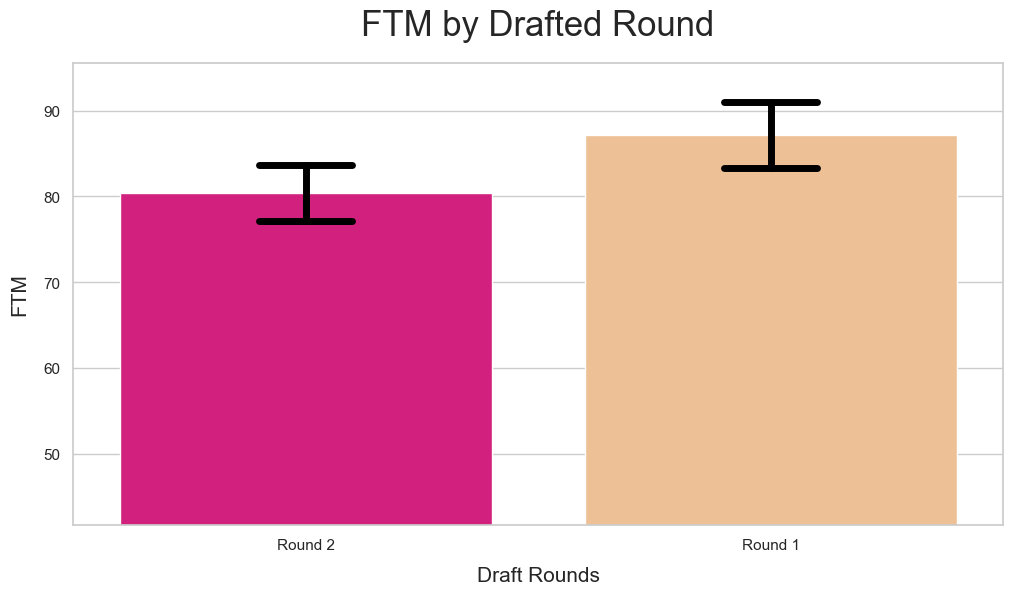

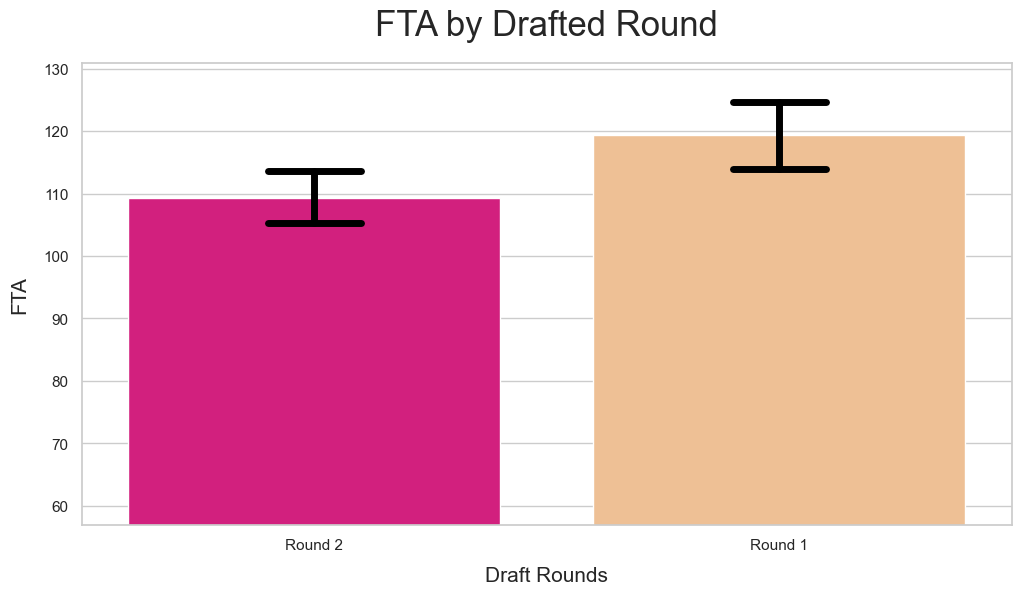

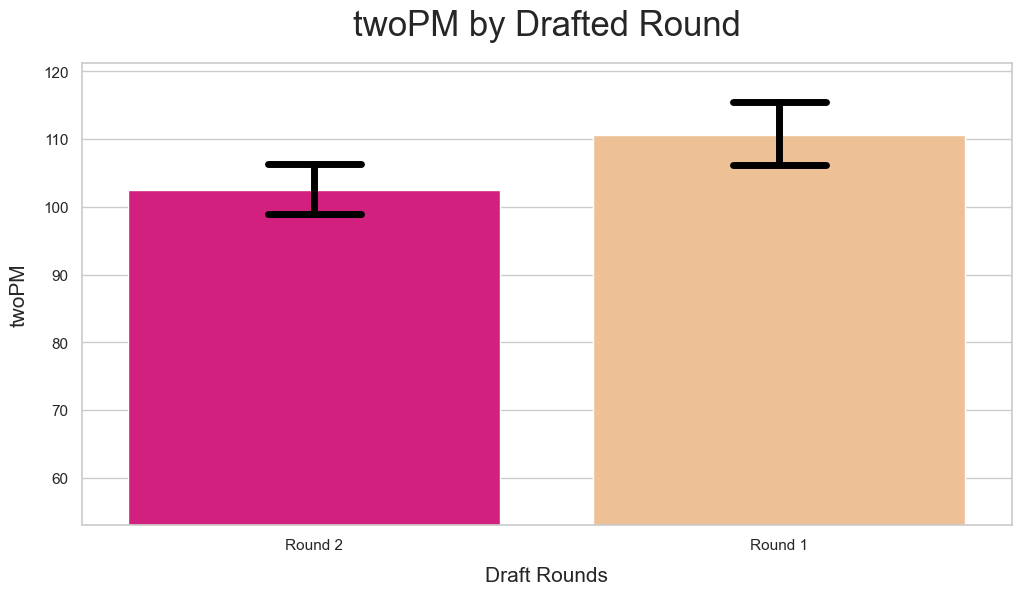

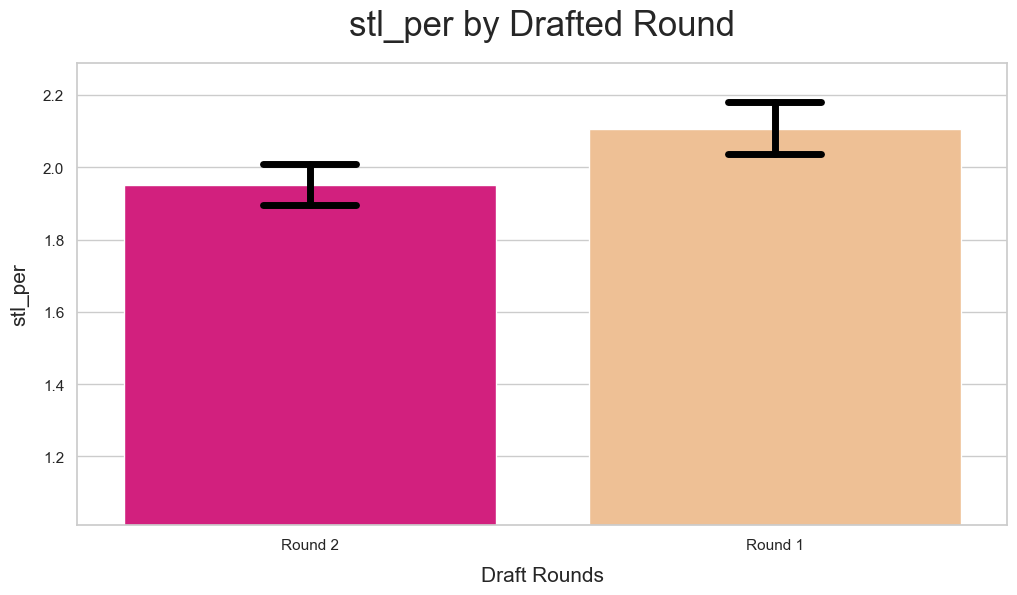

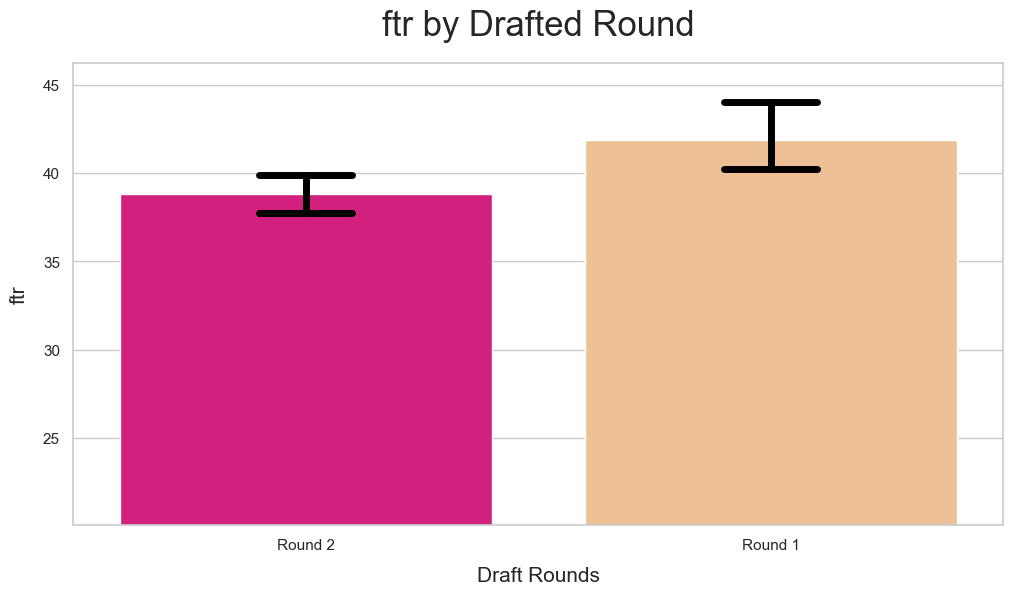

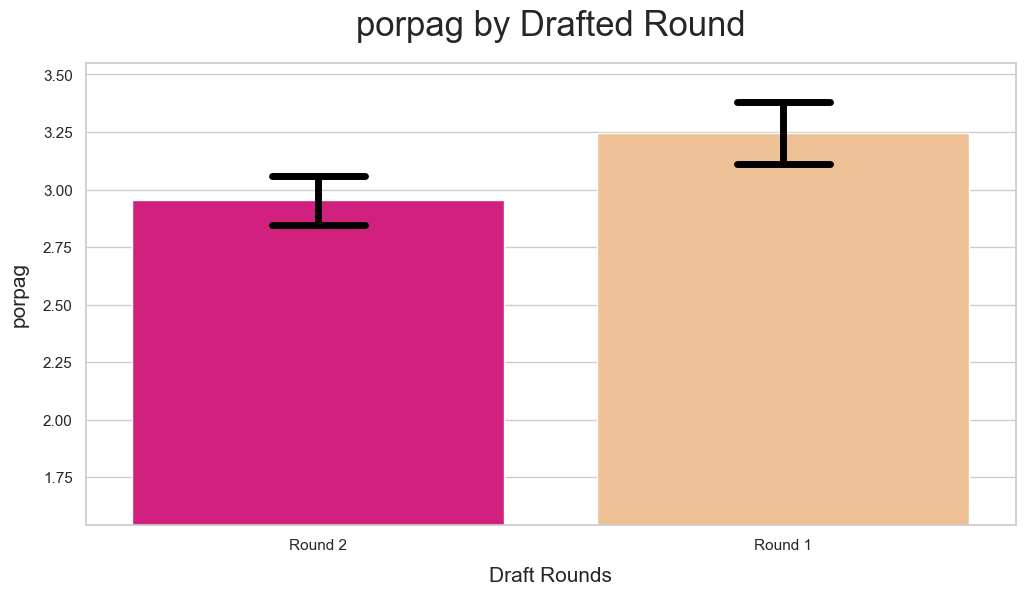

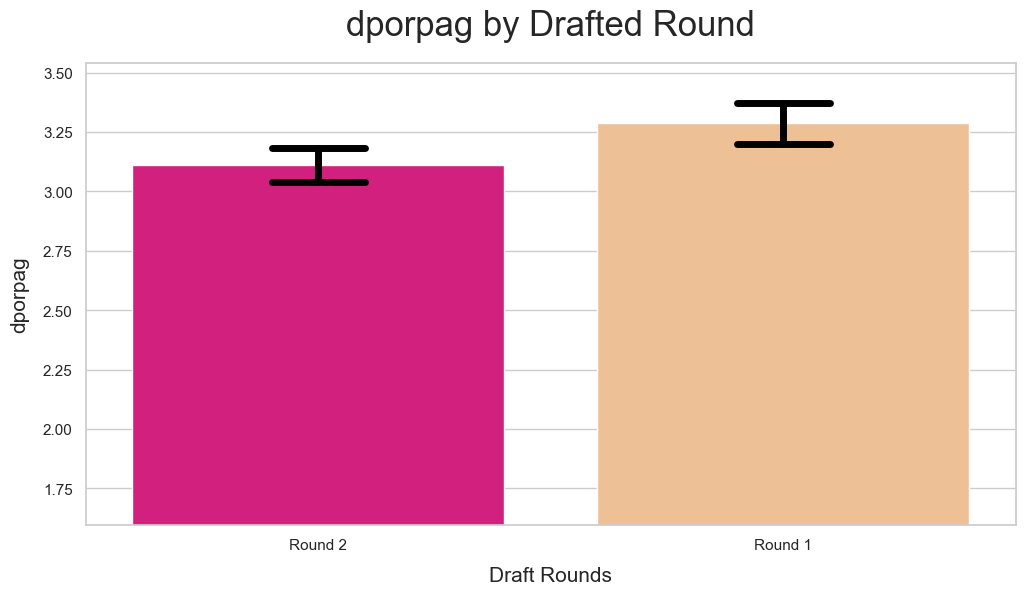

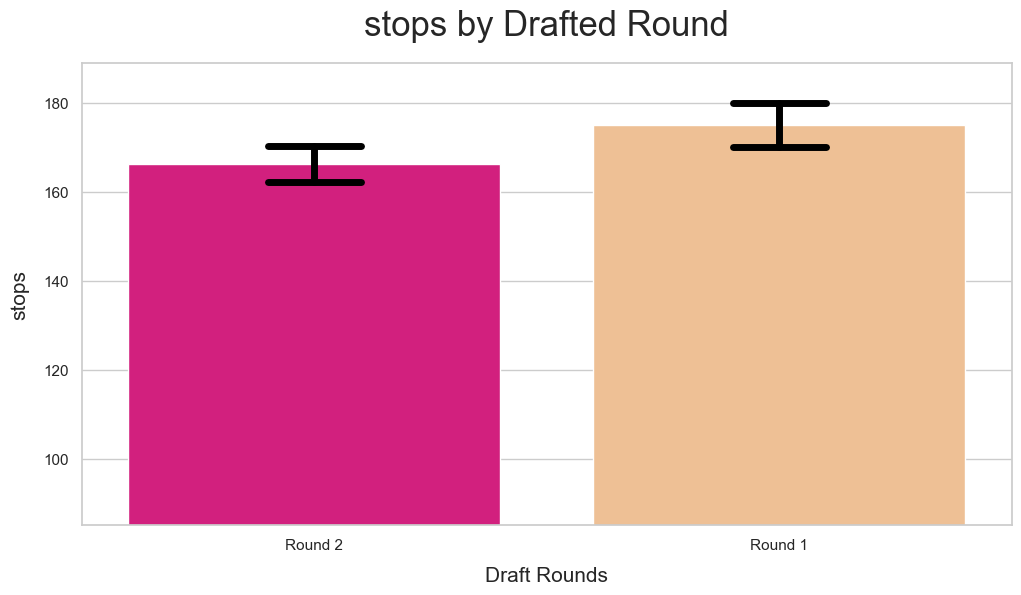

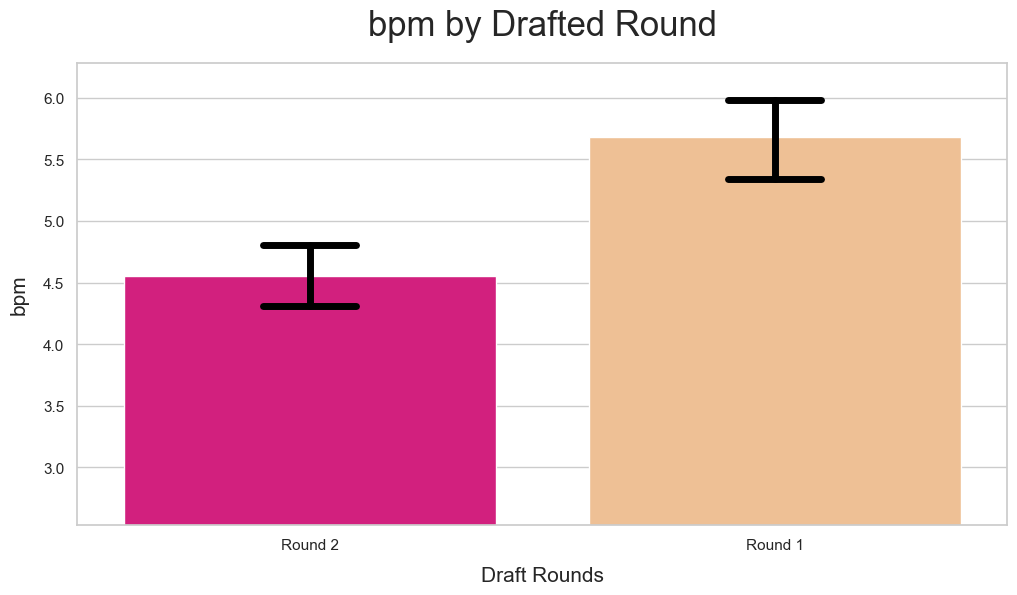

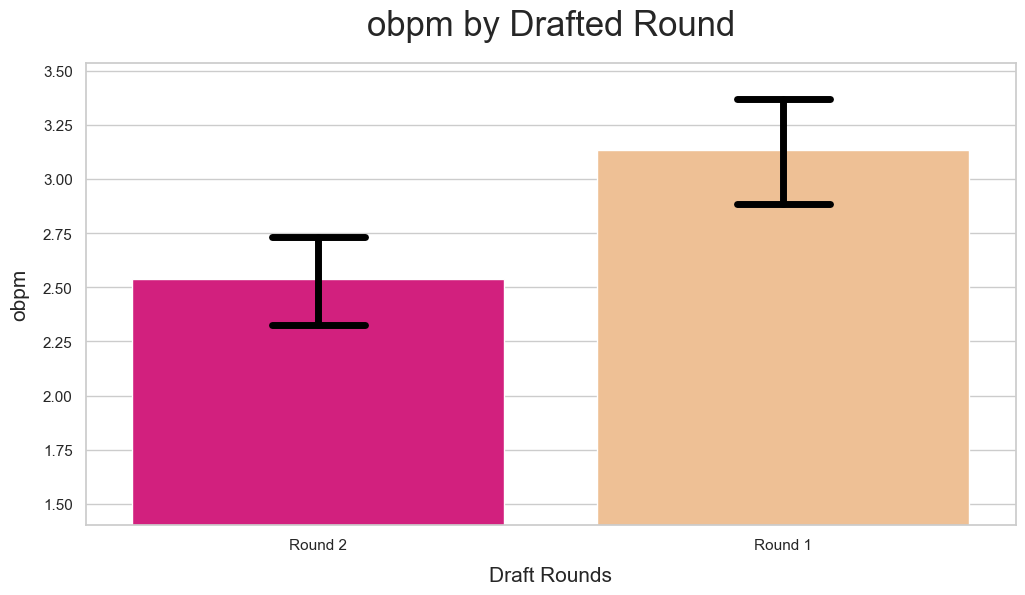

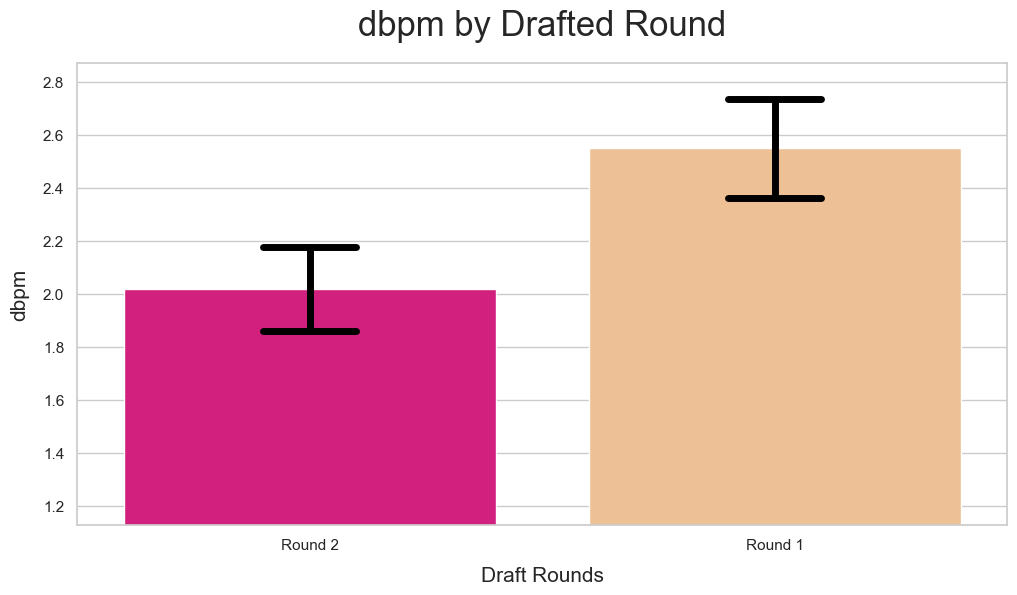

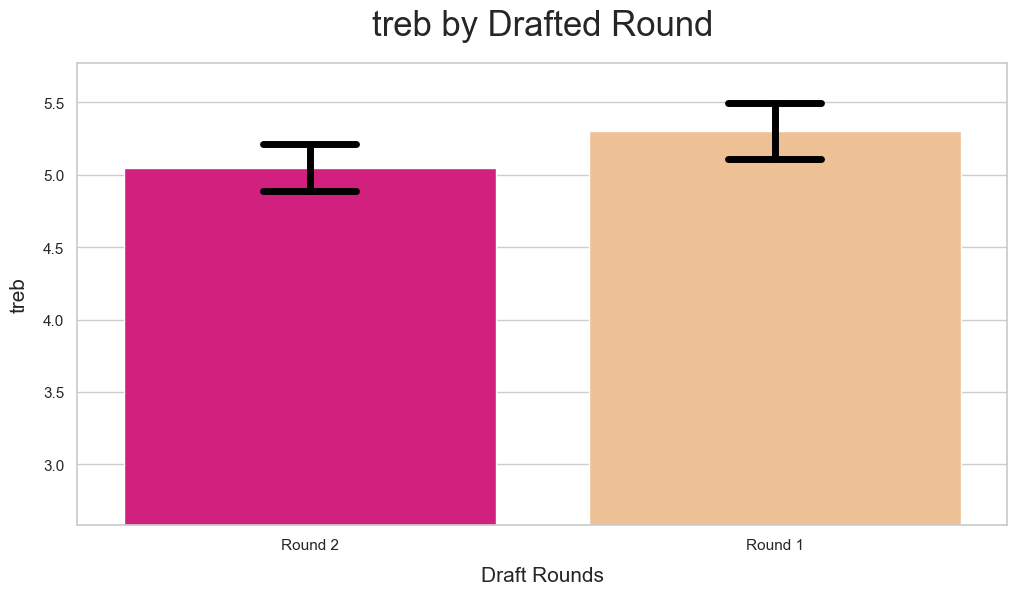

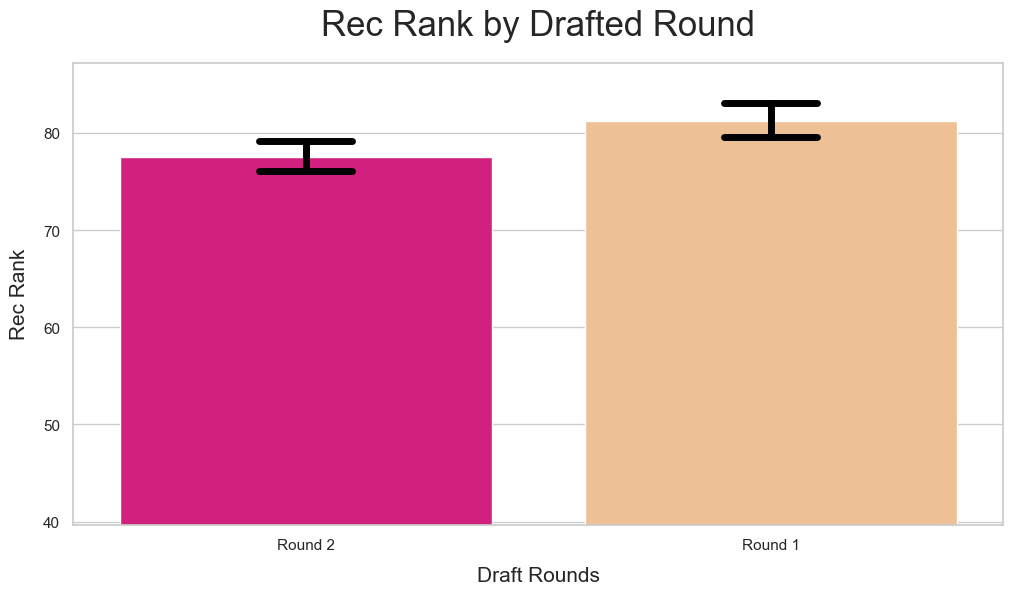

In [26]:
#plotting selected barplots for comparisons

sns.set_theme(style='whitegrid')
for i in names:
    plt.figure(figsize=(12,6))
    sns.barplot(x = 'Class', y = i, data=data, errwidth=5, errcolor='black', palette='Accent_r', capsize=0.2)
    plt.title('{} by Drafted Round'.format(i), fontsize=25, pad=20)
    plt.xlabel('Draft Rounds', fontsize=15, labelpad=10)
    plt.ylabel(i, fontsize=15, labelpad=10)
    plt.xticks(ticks = [0,1], labels= ['Round 2', 'Round 1'])
    plt.ylim(data[i].mean()*0.5)
    plt.show()

## Conclusions

While the dataset has many variables, there seems to be a handful variables that visually and statsically show differences between classes. Some but not all include conference, graduation status, offensive rebounds per game, and box plus minus. In feature_and_models.ipynb, we put these selected predictors as with the others to the test.